# Implementing a Stacked Autoencoder

[Prashant Brahmbhatt](https:www.github.com)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.p

In [0]:
tf.reset_default_graph()

## Parameters

Since the images in the dataset are of 28 x 28 the inputs will be 784 and considering the strides of 2 in each hidden layer the image will be reduced by half factor. 

In [0]:
num_inputs = 784 
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1 
num_outputs = num_inputs

learning_rate = 0.01

### Activation Function

In [0]:
actf = tf.nn.relu

### Placeholder

In [0]:
X = tf.placeholder(tf.float32, shape = [None, num_inputs])

### Weights

Initializer capable of adapting its scale to the shape of weights tensors.

With `distribution="normal"`, samples are drawn from a truncated normal
distribution centered on zero, with `stddev = sqrt(scale / n)`
where n is:
  - number of input units in the weight tensor, if mode = "fan_in"
  - number of output units, if mode = "fan_out"
  - average of the numbers of input and output units, if mode = "fan_avg"

With `distribution="uniform"`, samples are drawn from a uniform distribution
within [-limit, limit], with `limit = sqrt(3 * scale / n)`.


In [0]:
inititalizer= tf.variance_scaling_initializer()

In [0]:
w1 = tf.Variable(inititalizer([num_inputs, neurons_hid1], tf.float32))
w2 = tf.Variable(inititalizer([neurons_hid1, neurons_hid2], tf.float32))
w3 = tf.Variable(inititalizer([neurons_hid2, neurons_hid3], tf.float32))
w4 = tf.Variable(inititalizer([neurons_hid3, num_outputs], tf.float32))

### Biases

In [0]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

### Activation Function and Layers

In [0]:
act_func = tf.nn.relu

In [0]:
hid_layer1 = act_func(tf.matmul(X, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
output_layer = tf.matmul(hid_layer3, w4) + b4

### Loss Function

In [0]:
loss = tf.reduce_mean(tf.square(output_layer - X))

### Optimizer 

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

### The Session

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

In [21]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        for iteration in range(num_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict = {X: X_batch})
        
        training_loss = loss.eval(feed_dict = {X: X_batch})
        
        print("Epoch: {},  Training Loss: {}".format(epoch, training_loss))
        
    saver.save(sess, "./stacked_autoencoder.ckpt")
        

Epoch: 0,  Training Loss: 0.027437448501586914
Epoch: 1,  Training Loss: 0.025718651711940765
Epoch: 2,  Training Loss: 0.024191666394472122
Epoch: 3,  Training Loss: 0.023964494466781616
Epoch: 4,  Training Loss: 0.022214338183403015


### Testing Autoencoder

In [22]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess, "./stacked_autoencoder.ckpt")
    
    results=  output_layer.eval(feed_dict = {X: mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder.ckpt


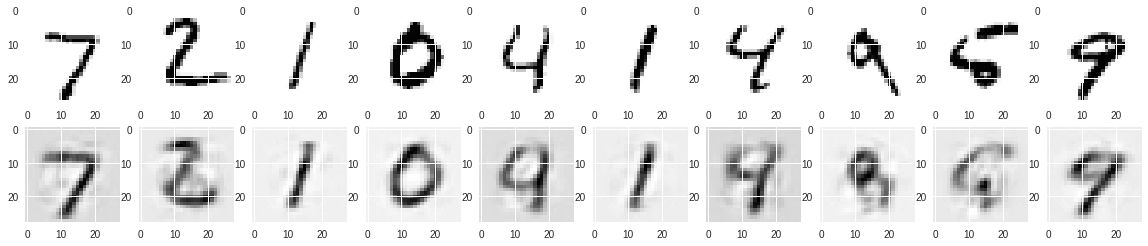

In [25]:
f, a = plt.subplots(2, 10, figsize = (20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))

### de nada!